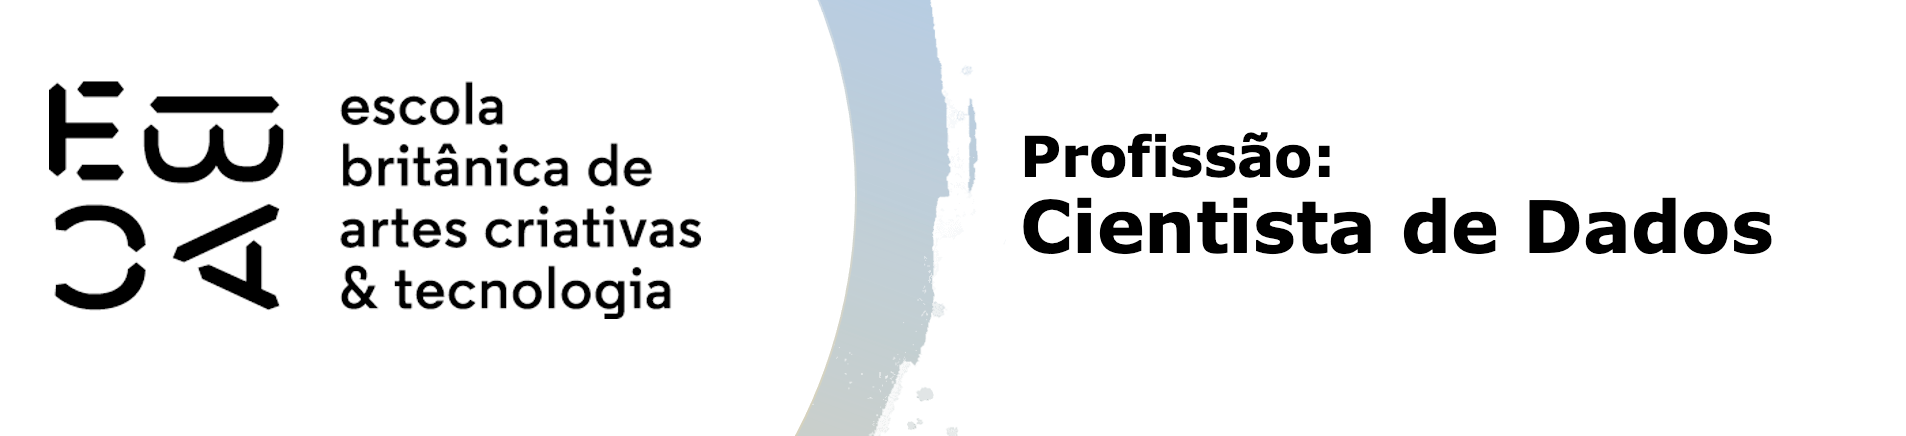

# Tarefa

Com base na tarefa realizada no módulo anterior, vamos fazer um diagnóstico do modelo.

Carregue a base ```previsao_de_renda2.csv```. Separe em uma base de treino e uma base de teste.

Vamos resgatar a melhor versão do modelod e previsão de renda que você fez para esta base. 

- Substitua missings pela média
- Rode novamente o modelo na base de treino (ou desenvolva-o caso não tenha o registro guardado). 

Este modelo deve prever a variável ```renda``` com base nas demais variáveis exceto ```data_ref``` e ```index```. Já vimos que a variável renda é melhor modelada com a transformação ```log()```, não se esqueça disso.

In [38]:
import pandas                   as pd
import matplotlib.pyplot        as plt
import numpy                    as np
import statsmodels.api          as sm
import statsmodels.formula.api  as smf
import seaborn                  as sns
from    statsmodels.tools.tools import add_constant
from    statsmodels.stats.outliers_influence import variance_inflation_factor
from    scipy.stats             import t

df = pd.read_csv(r'Dados\previsao_de_renda_II.csv')
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40
749996,2016-03-01,9144,F,N,S,0,Pensionista,Superior completo,Casado,Casa,65,NaN,2.0,4084.37
749997,2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66
749998,2016-03-01,3024,F,S,S,1,Empresário,Superior completo,União,Casa,28,8.219178,3.0,9159.49


Modelagem utilizando o operador log() na variavel "renda"

In [39]:
df['log_renda'] = np.log(df['renda'])

# Após a analise basica do df, é possivel observar que existem valores faltantes na variavel tempo_emprego, vou remover as linhas com valores faltantes
df = df.dropna()

df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,9.318131
1,2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,7.793508
2,2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,9.528769
3,2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,7.767196
4,2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,6.673020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749993,2016-03-01,7163,M,N,S,0,Empresário,Superior completo,Solteiro,Casa,33,4.627397,1.0,2254.72,7.720781
749994,2016-03-01,1487,M,N,N,0,Servidor público,Médio,Casado,Casa,43,7.589041,2.0,1462.17,7.287677
749995,2016-03-01,11611,F,N,S,1,Assalariado,Superior completo,Casado,Casa,29,8.665753,3.0,2930.40,7.982894
749997,2016-03-01,16583,F,N,S,0,Assalariado,Superior completo,Casado,Casa,33,10.969863,2.0,4339.66,8.375551


Rodando novamente o modelo e utilizando a transformação logaritima na variavel "renda"

In [40]:
# Como o melhor modelo desenvolvido foi o de regressão utlizando os agrupamento, vou recarrega-lo
modelo = smf.ols('log_renda ~ tempo_emprego  + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 2.049e+04
Date:                ter, 26 ago 2025   Prob (F-statistic):               0.00
Time:                        13:07:40   Log-Likelihood:            -8.8755e+05
No. Observations:              624240   AIC:                         1.775e+06
Df Residuals:                  624216   BIC:                         1.775e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

## Verifique as suposições do modelo

Faça uma análise para avaliar as suposições básicas:

- Os resíduos desse modelo possuem distribuição Normal (ou algo próximo)?
- Verifique a independência dos resíduos
    - Faça um gráfico dos resíduos versus os valores preditos
    - Avalie se há padrões dos resíduos versus cada uma das variáveis do modelo
    - Avalie se o valor médio dos resíduos aparenta ter relação com o mês de referência
- Avalie se a variância da variável resposta parece ser conforme os valores previstos.

Você considera que as suposições estão atendidas? Há algum impacto em eventuais desvios?

In [41]:
# Verificação de residuos
residuos = modelo.resid

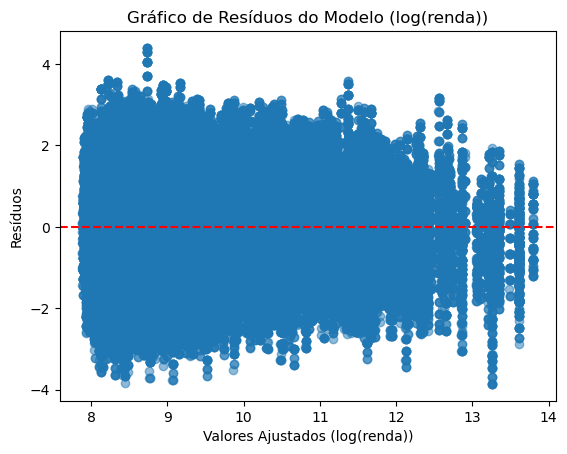

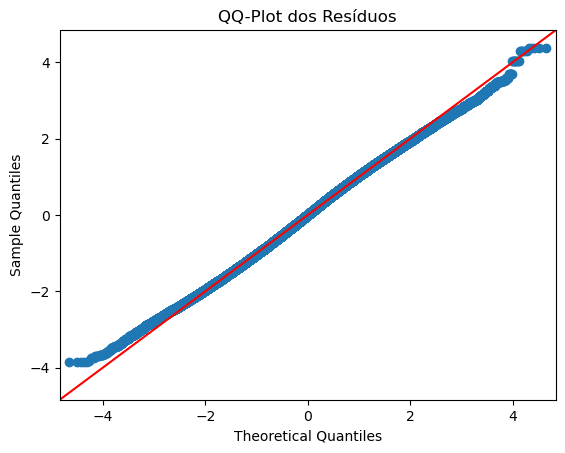

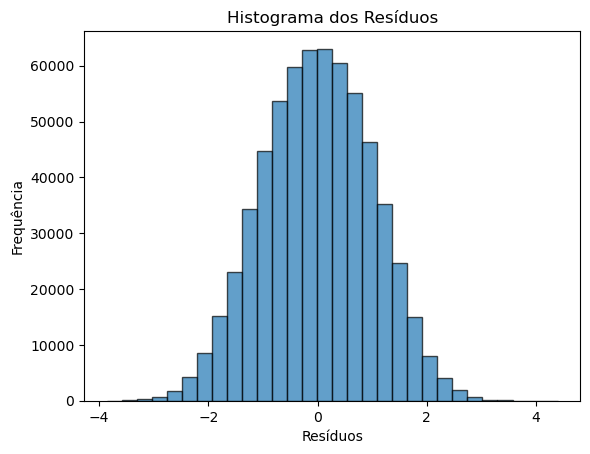

In [42]:
# Gráfico de resíduos
plt.scatter(modelo.fittedvalues, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados (log(renda))')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos do Modelo (log(renda))')
plt.show()

# QQ-Plot para verificar normalidade
sm.qqplot(residuos, line='45', fit=True)
plt.title('QQ-Plot dos Resíduos')
plt.show()

# Histograma dos resíduos para avaliar a distribuição normal
plt.hist(residuos, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()

Ao observar tanto o histograma quanto o plot Q-Q da distribuição dos residuos, é posspível determinar que sua distribuição é normal.

## Outliers

Avalie os *studentized residuals*, verifique se há pontos que parecem ser discrepantes.

Avalie se há pontos influentes.

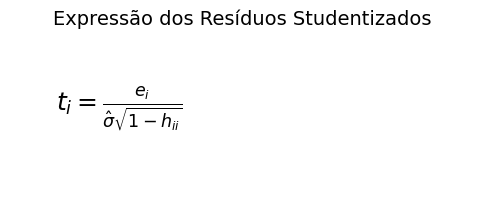

In [43]:
plt.figure(figsize=(6, 2))
plt.text(0.1, 0.5, r"$t_i = \frac{e_i}{\hat{\sigma} \sqrt{1 - h_{ii}}}$", fontsize=18)
plt.axis("off")
plt.title("Expressão dos Resíduos Studentizados", fontsize=14)
plt.show()

In [44]:
# Calculando os residuos studentizados utilziando o pacote statsmodels
residuos_studentizados = modelo.get_influence().resid_studentized

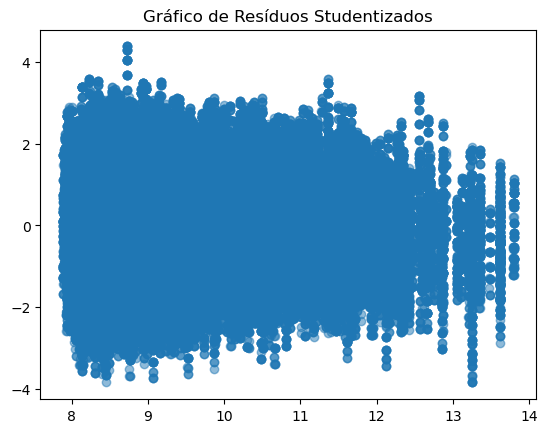

In [45]:
# Grafico de resíduos studentizados
plt.scatter(modelo.fittedvalues, residuos_studentizados, alpha=0.5)
plt.title('Gráfico de Resíduos Studentizados')
plt.show()

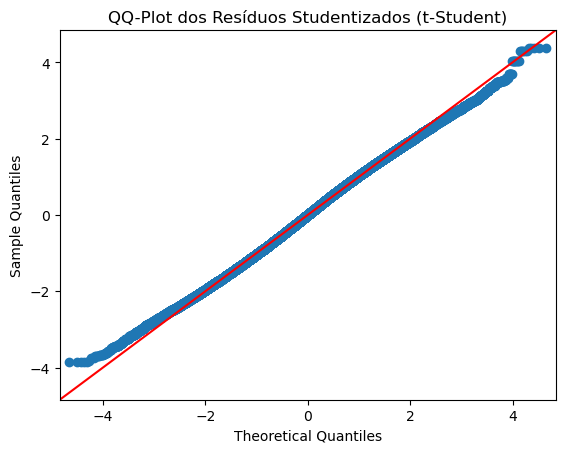

In [46]:
# Grafico QQ-Plot dos resíduos studentizados
sm.qqplot(residuos_studentizados, dist=t, line='45', fit=True, distargs=(modelo.df_resid,))
plt.title("QQ-Plot dos Resíduos Studentizados (t-Student)")
plt.show()

In [47]:
# Calcular os outliers com base nos resíduos studentizados
outliers = np.where(np.abs(residuos_studentizados) > 2)[0]
print(f'Índices dos outliers: {outliers}')

# Contagem de outliers
num_outliers = len(outliers)
print(f'Número de outliers: {num_outliers}')

# Porcentual de outliers
porcentagem_outliers = (num_outliers / len(residuos_studentizados)) * 100
print(f'Porcentagem de outliers: {porcentagem_outliers:.2f}%')

Índices dos outliers: [    95    111    138 ... 624204 624211 624222]
Número de outliers: 24724
Porcentagem de outliers: 3.96%


## Multicolinearidade

Avalie se há questões relacionadas a multicolinearidade através de pelo menos:

- Matriz de correlação de Spearman
- VIF

In [48]:
# Devido as necessidades da matriz de spearman, é necessario converter a coluna data_ref para o formato datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Como na matris de correlação de spearman só podem ser utilizados valores numeros, vou remove as colunas categoricas e a coluna data_ref
df_numerico = df.drop(columns=['data_ref', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'])
df_numerico.head()

C:\Users\Rafael\AppData\Local\Temp\ipykernel_17600\1175471991.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_ref'] = pd.to_datetime(df['data_ref'])


,index,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,5762,0,47,16.717808,2.0,11138.14,9.318131
1,1279,0,30,9.600000,2.0,2424.81,7.793508
2,14111,0,28,8.208219,2.0,13749.66,9.528769
3,8189,2,44,1.301370,4.0,2361.84,7.767196
4,1830,2,33,1.254795,4.0,790.78,6.673020


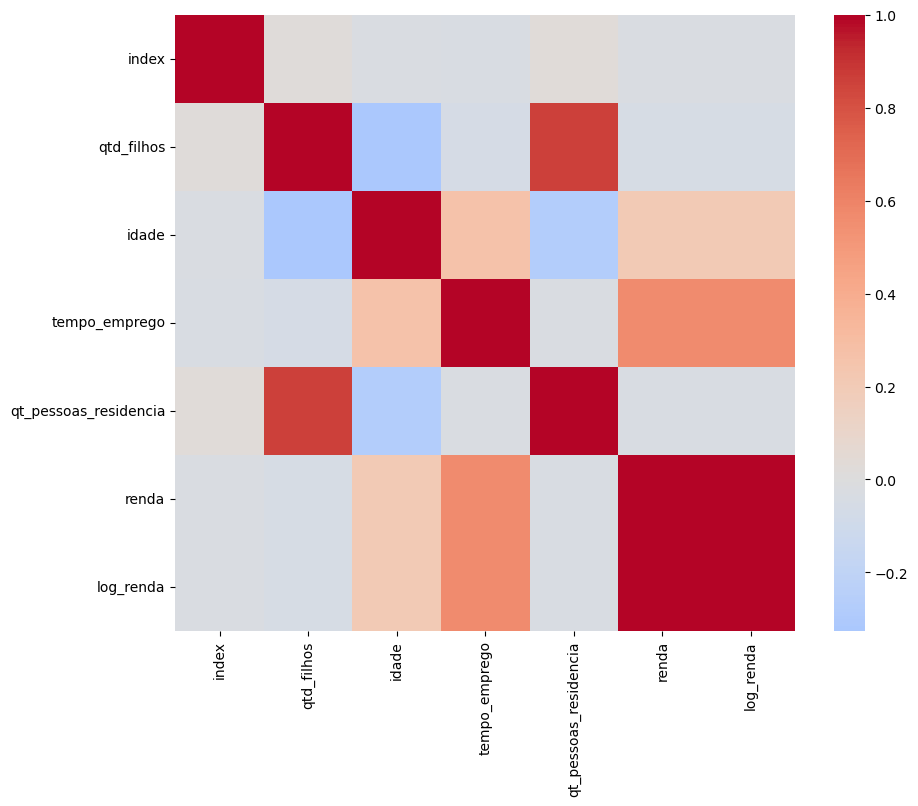

In [49]:
# Criação da matriz de correlação de spearman
correlacao_spearman = df_numerico.corr(method='spearman')

# Plot da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacao_spearman, cmap = "coolwarm", center=0)
plt.show()

In [50]:
# Calcular o VIF, para realizar o calculo do VIF, é necessario adicionar uma constante e remover a variavel dependente
X = df_numerico.drop(columns=['renda', 'log_renda', 'index'])
X = sm.add_constant(X)

X

,const,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia
0,1.0,0,47,16.717808,2.0
1,1.0,0,30,9.600000,2.0
2,1.0,0,28,8.208219,2.0
3,1.0,2,44,1.301370,4.0
4,1.0,2,33,1.254795,4.0
...,...,...,...,...,...
749993,1.0,0,33,4.627397,1.0
749994,1.0,0,43,7.589041,2.0
749995,1.0,1,29,8.665753,3.0
749997,1.0,0,33,10.969863,2.0


In [51]:
# Cálculo do VIF para cada variável
vif = pd.DataFrame()
vif['Variável'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                Variável        VIF
0                  const  42.467524
1             qtd_filhos   5.509238
2                  idade   1.221641
3          tempo_emprego   1.122870
4  qt_pessoas_residencia   5.397575


## Ajustes

Faça os ajustes que julgar necessários no modelo e compare as métricas de desempenho do modelo original e ajustado na base de testes.

Como é possivel verificar após os calculos do VIF, as variaveis 'qrd_filhos' e 'qt_pessoas_residencia' apresentaram um grau elevado de correlação. Portanto um dos possiveis ajustes a serem realizados seria retira-las do modelo e reavalizar como ele ira se comportar.

In [53]:
# Refazendo o modelo sem as variaveis que apresentaram VIF elevado
modelo_ajustado = smf.ols('log_renda ~ tempo_emprego  + posse_de_veiculo + posse_de_imovel + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego', data=df).fit()
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 2.244e+04
Date:                ter, 26 ago 2025   Prob (F-statistic):               0.00
Time:                        13:12:23   Log-Likelihood:            -8.8757e+05
No. Observations:              624240   AIC:                         1.775e+06
Df Residuals:                  624218   BIC:                         1.775e+06
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Após a retirada das variaveis que apresentaram colinearidade elevada, não houve alteração no comportamento do modelo. Portanto ambas não possuem grande peso no modelo.